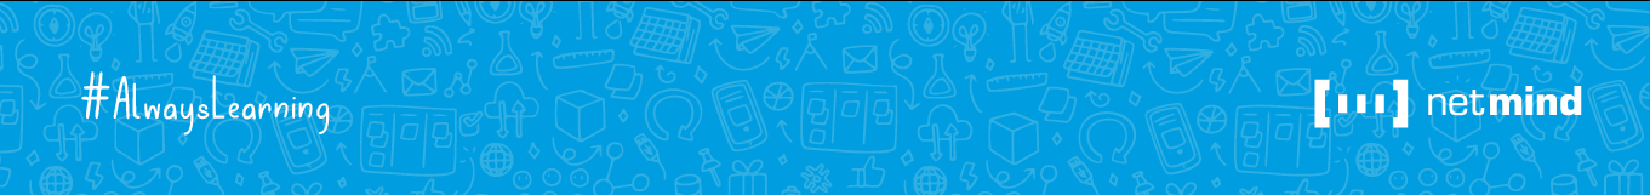
# **Búsqueda del mejor modelo**

Pasar el proceso de prueba y error para encontrar el modelo de mejor rendimiento puede llevar mucho tiempo. 
- En lugar de tener que probar y evaluar manualmente varias configuraciones para entrenar un modelo, se puede automatizar usando AutoML.
- AutoML permite probar varias transformaciones y algoritmos de preprocesamiento para encontrar el mejor modelo.
- Permite: clasificación, regresión, series temporales, Computer Vision y NLP

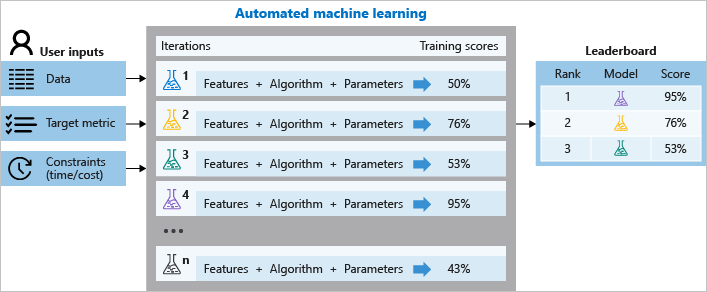

https://learn.microsoft.com/es-es/azure/machine-learning/concept-automated-ml?view=azureml-api-2

## **Preprocesar datos y configurar características**

Para poder ejecutar un experimento AutoML, se debe preparar los datos y crear un recurso de datos en Azure Machine Learning. 
- Para que AutoML comprenda cómo leer los datos, se debe crear un recurso de datos *MLTable* que incluya el esquema de los datos.
- Se almacenan en una carpeta junto con los datos. 

Especificar la entrada con el código siguiente:

In [ ]:
from azure.ai.ml.constants import AssetTypes
from azure.ai.ml import Input

my_training_data_input = Input(type=AssetTypes.MLTABLE, path="azureml:input-data-automl:1")

### Escalado y la normalización
AutoML aplica escalado y normalización a los datos numéricos automáticamente, lo que ayuda a evitar que las características a gran escala dominen el entrenamiento. 
Durante un experimento de AutoML, se aplicarán varias técnicas de escalado o normalización.

### Configuración de características opcionales
Se puede elegir que AutoML aplique transformaciones de preprocesamiento, como:

- Imputación de valores faltantes para eliminar los valores NULL del conjunto de datos de entrenamiento.
- Codificación de categorías para convertir características de categorías en indicadores numéricos.
- Eliminar variables de alta cardinalidad, como los identificadores de registro.
- Ingeniería de características (por ejemplo, derivar partes de fecha individuales de las características de DateTime)

De forma predeterminada, AutoML realizará la featurización en los datos. 
- Se puede deshabilitar si no desea que se transformen los datos.

Si se desea usar la función de caracterización integrada, se puede personalizar. 
- Por ejemplo, se puede especificar qué método de imputación se debe usar para una característica específica.

Una vez completado un experimento de AutoML, se podrá revisar qué métodos de escalado y normalización se han aplicado. 
- También se recibirá una notificación si AutoML ha detectado algún problema con los datos, como si faltan valores o desequilibrio de clases.

## **Ejecución de un experimento**

Los algoritmos que usa AutoML dependerán de la tarea que especifique. 

- Clasificación: https://learn.microsoft.com/es-es/azure/machine-learning/how-to-configure-auto-train?view=azureml-api-2#supported-algorithms
- Regresión: https://learn.microsoft.com/es-es/azure/machine-learning/how-to-configure-auto-train?view=azureml-api-2&tabs=python#supported-algorithms
- Series temporeales: https://learn.microsoft.com/es-es/azure/machine-learning/how-to-configure-auto-train?view=azureml-api-2#supported-algorithms

### Restricción de la selección de algoritmos
De forma predeterminada, AutoML seleccionará aleatoriamente entre el intervalo completo de algoritmos de la tarea especificada. 
- Se puede optar por impedir que se seleccionen algoritmos individuales; lo que puede ser útil si sabe que los datos no son adecuados para un tipo determinado de algoritmo. 
- también se puede bloquear determinados algoritmos si se tiene que cumplir una directiva que restrinja el tipo de algoritmos de aprendizaje automático que puede usar en su organización.

### Configuración de un experimento AutoML
- Se configura el experimento mediante la clase automl. 

Ejemplo clasificaciòn:

In [ ]:
from azure.ai.ml.automl import ClassificationPrimaryMetrics
 
list(ClassificationPrimaryMetrics)

### Especificación de la métrica principal
- Es la métrica de rendimiento de destino para la que se determinará el modelo óptimo. 
- Azure Machine Learning admite un conjunto de métricas con nombre para cada tipo de tarea.

Para recuperar la lista de métricas disponibles (ej. clasificaicón):

In [ ]:
from azure.ai.ml.automl import ClassificationPrimaryMetrics
 
list(ClassificationPrimaryMetrics)

### Establecimiento de límites
El entrenamiento de modelos tiene un coste de cálculo. Para minimizar los costos y el tiempo invertido en el entrenamiento, se puede establecer límites en un job de AutoML mediante `set_limits()`.

Hay varias opciones para establecer límites en un experimento de AutoML:

- timeout_minutes: número de minutos después de que finalice el experimento autoML completo.
- trial_timeout_minutes: número máximo de minutos que puede tardar una prueba.
- max_trials: número máximo de pruebas o modelos que se entrenarán.
- enable_early_termination: indica si finalizar el experimento si la puntuación no mejora a corto plazo.

Si desea establecer el número máximo de pruebas paralelas para que sea menor que el número máximo de nodos, puede usar `max_concurrent_trials`.

In [ ]:
classification_job.set_limits(
    timeout_minutes=60, 
    trial_timeout_minutes=20, 
    max_trials=5,
    enable_early_termination=True,
)

### Envío de un experimento de AutoML
Puede enviar un trabajo de AutoML con el código siguiente:

In [ ]:
returned_job = ml_client.jobs.create_or_update(
    classification_job
)

Para supervisar las ejecuciones se puede obtener un vínculo directo al job:

In [ ]:
aml_url = returned_job.studio_url
print("Monitor your job at", aml_url)

## **Evaluación y comparación de modelos**

- En Azure Machine Learning Studio, seleccionar un experimento de AutoML para explorar sus detalles.
- En la página Información general de la ejecución del experimento, revisar el recurso de datos de entrada y el resumen del mejor modelo. 
- Para explorar todos los modelos entrenados, puede seleccionar la pestaña Modelos.

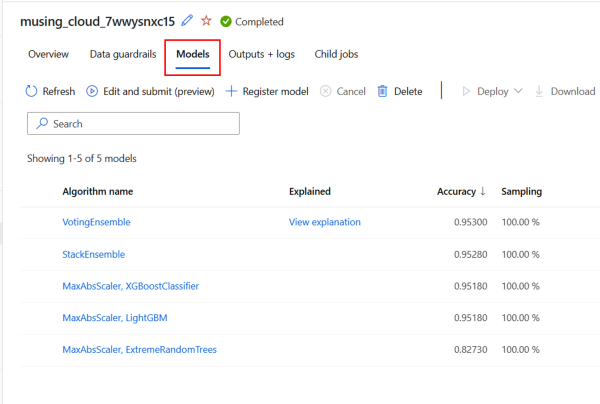

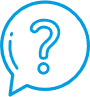
## **¿Preguntas?**

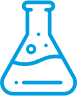
## **Lab 1**

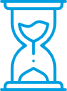
## **Ejercicio**

Usando el dataset de precios de casas (data/house_price/data.csv):
- Usa AutoML para encontrar el mejor modelo que permita una predecir un precio de casa.